In [18]:
import pandas as pd
import quandl
from statsmodels.tsa.seasonal import seasonal_decompose
#from fbprophet import Prophet

In [2]:
#conda install -c conda-forge fbprophet

In [3]:
f = open('quandlApiKey.txt','r',-1,"utf-8")
QUANDL_KEY = f.readline()
quandl.ApiConfig.api_key=QUANDL_KEY

df = quandl.get(dataset = 'WGC/GOLD_MONAVG_USD', start_date='2000-01-01',end_date='2011-12-31')

df.rename(columns={'Value':'price'},inplace=True)
df=df.resample('M').last()


<AxesSubplot:title={'center':'Gold Price'}, xlabel='Date'>

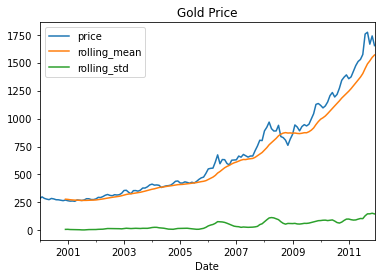

In [4]:
WINDOW_SIZE = 12
df['rolling_mean'] = df.price.rolling(window=WINDOW_SIZE).mean()
df['rolling_std'] = df.price.rolling(window=WINDOW_SIZE).std()
df.plot(title='Gold Price')

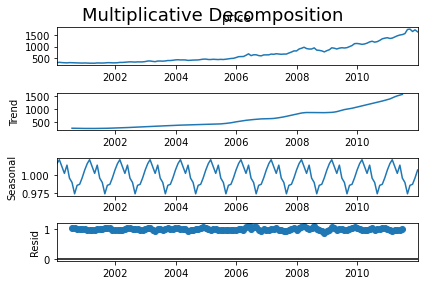

In [5]:
#승산적 모델을 사용해 계절성 분해를 수행
decomposition_results = seasonal_decompose(df.price,model = 'multiplicative')

decomposition_results.plot() \
            .suptitle('Multiplicative Decomposition',fontsize=18);

# Facebook Prophet

In [6]:
import pandas as pd
import seaborn as sns
import quandl
from fbprophet import Prophet

In [7]:
f = open('quandlApiKey.txt','r',-1,"utf-8")
QUANDL_KEY = f.readline()
quandl.ApiConfig.api_key=QUANDL_KEY

In [8]:
df = quandl.get(dataset = 'WGC/GOLD_DAILY_USD', 
                start_date='2000-01-01',
               end_date='2005-12-31')

In [9]:
df.reset_index(drop=False,inplace = True)
df.rename(columns={'Date':'ds','Value':'y'},inplace = True)

In [10]:
#train_indices = df.ds.apply(lambda x:x.year)<2005
#df_train = df.loc[train_indices].dropna()
#df_test=df.loc[~train_indices].reset_index(drop=True)

train_indices = df.ds.apply(lambda x: x.year).values < 2005
df_train = df.loc[train_indices].dropna()
df_test = df.loc[~train_indices].reset_index(drop=True)

In [11]:
#model_prophet = Prophet(seasonality_mode ='additive')
#model_prophet.add_seasonality(name='monthly', period=30.5, fourier_order=5)
#model_prophet.fit(df_train)
model_prophet = Prophet(seasonality_mode='additive')
model_prophet.daily_seasonality=True
model_prophet.weekly_seasonality=True

model_prophet.add_seasonality(name='monthly', period=30.5, fourier_order=5)




In [12]:
model_prophet.fit(df_train)

In [1]:
#conda install -c conda-forge pystan==2.19.1.1
#pip install pandas==1.0.4
#conda install -c conda-forge fbprophet conda install -c conda-forge/label/cf201901 fbprophet

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\user\anaconda3

  added / updated specs:
    - pystan==2.19.1.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    arviz-0.11.2               |     pyhd3eb1b0_0         1.3 MB
    blosc-1.21.1               |       hcbbf2c4_0         748 KB  conda-forge
    ca-certificates-2022.5.18.1|       h5b45459_0         180 KB  conda-forge
    cached-property-1.5.2      |       hd8ed1ab_1           4 KB  conda-forge
    cached_property-1.5.2      |     pyha770c72_1          11 KB  conda-forge
    certifi-2022.5.18.1        |   py38haa244fe_0         151 KB  conda-forge
    cftime-1.6.0               |   py38h6f4d8f0_0         162 KB  conda-forge
    curl-7.82.0                |       h2bbff1b_0         140 KB
    h5py-3.6.0                 |nompi_py38hde0384b_100         1.1 MB  conda-forge
    hdf4-4.2.15

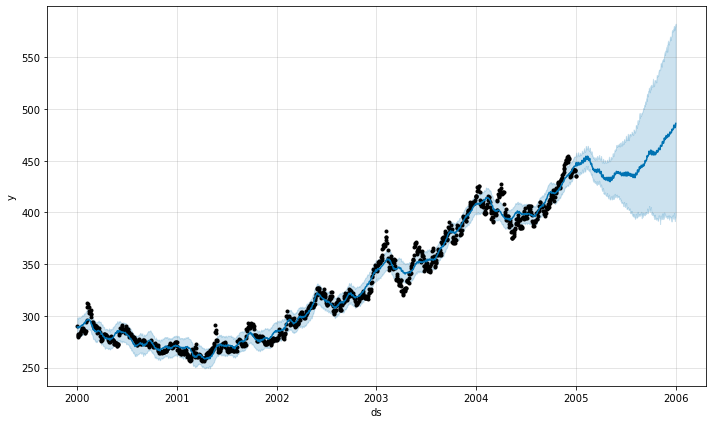

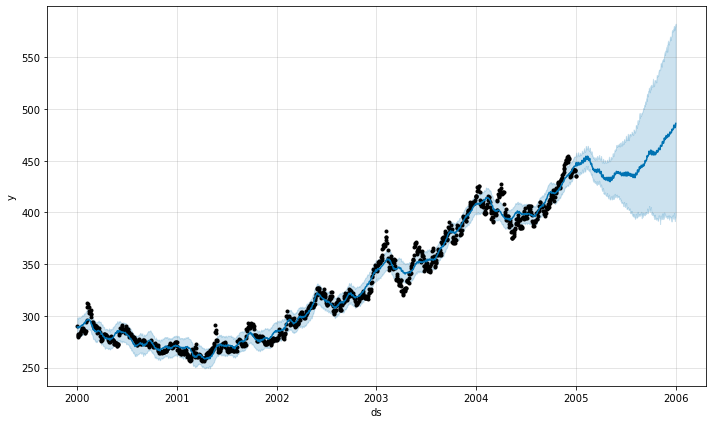

In [15]:
df_future = model_prophet.make_future_dataframe(periods=365)
df_pred = model_prophet.predict(df_future)
model_prophet.plot(df_pred)

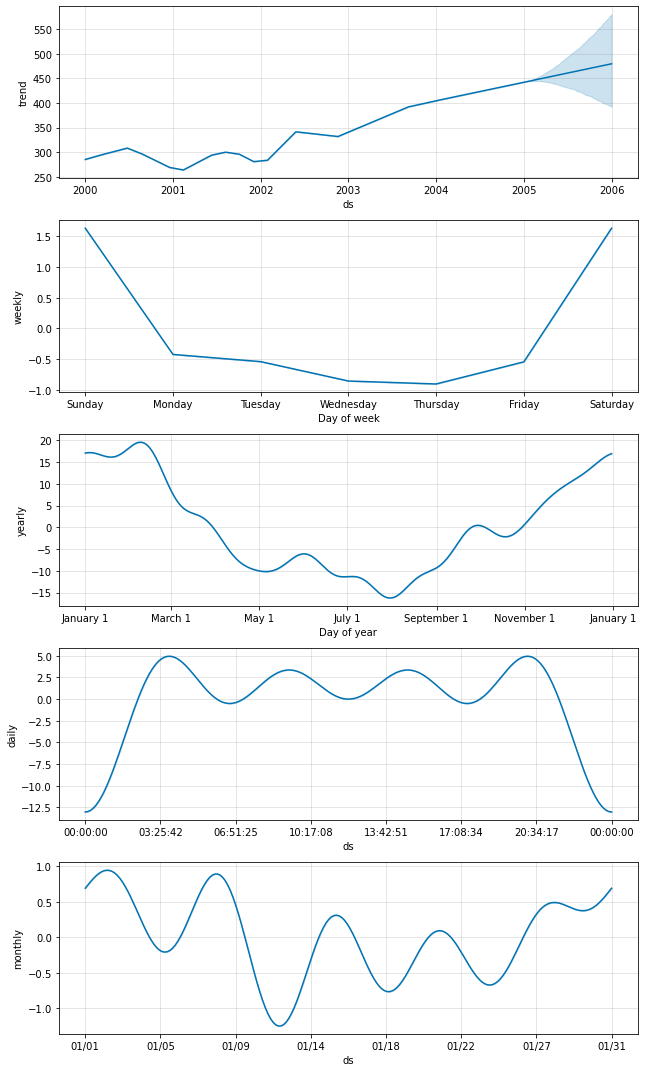

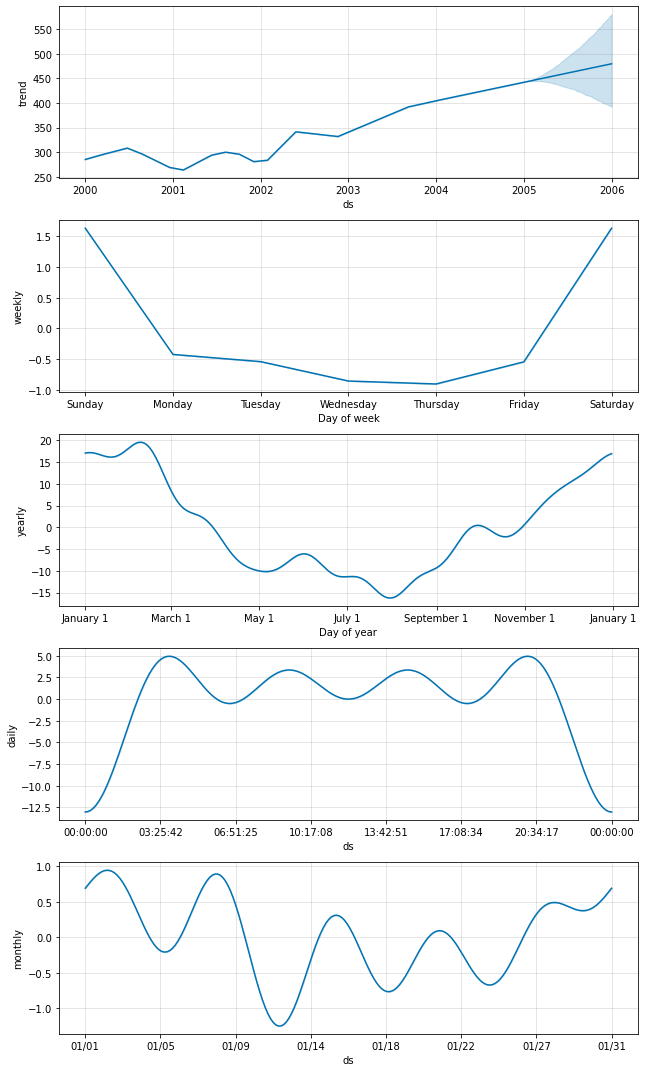

In [17]:
model_prophet.plot_components(df_pred)

In [ ]:
selected_columns = ['ds','yhat_lower','yhat_upper','yhay']

df_pred = df_pred.loc[:,selected_columns].reset_index(drop=True)
